**IMPORTATION NECESSAIRES**

In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import pandas as pd
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from joblib import load
from joblib import dump
import seaborn as sns
import pickle

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


**FINAL DATASET**

In [ ]:
datasetfinal=pd.read_csv("/content/drive/MyDrive/fake_news_detection/version_finale")

In [ ]:
datasetfinal

,text,label
0,haha see goal gomez million time,1
1,discov watch footbal player haha,1
2,lot say italian describ meet leagu three meet ...,1
3,artist pedro rey bite social critic whose piec...,0
4,shawki gharib technic director olymp team,0
...,...,...
68942,donald j trump address massacr orlando fla mon...,0
68943,arkansa parol board recommend one eight men se...,0
68944,everyon catch compani orang right 4 year next ...,1
68945,citi first minut goal one brought rahim alrass...,1


In [ ]:
datasetfinal.describe()

,label
count,68947.000000
mean,0.486258
std,0.499815
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
datasetfinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68947 entries, 0 to 68946
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    68947 non-null  object
 1   label   68947 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [ ]:
datasetfinal.isnull().sum()

text     0
label    0
dtype: int64

In [ ]:
datasetfinal.columns

Index(['text', 'label'], dtype='object')

In [ ]:
#save
datasetfinal.to_csv("/content/drive/MyDrive/fake_news_detection/version_finale", index=False)

In [ ]:
datasetfinal

,text,label
0,"haha, you see the goal of gomez a million times",1
1,i discovered that you watched football because...,1
2,the lot says italians describe each other\nand...,1
3,The artist Pedro Reyes is a biting social crit...,0
4,"once again shawky gharib, technical director o...",0
...,...,...
68942,Donald J. Trump addressed the massacre in Orla...,0
68943,The Arkansas Parole Board has recommended that...,0
68944,everyone catches up because there are no other...,1
68945,"city in the first minute of a goal, and the on...",1


**PLOTING**

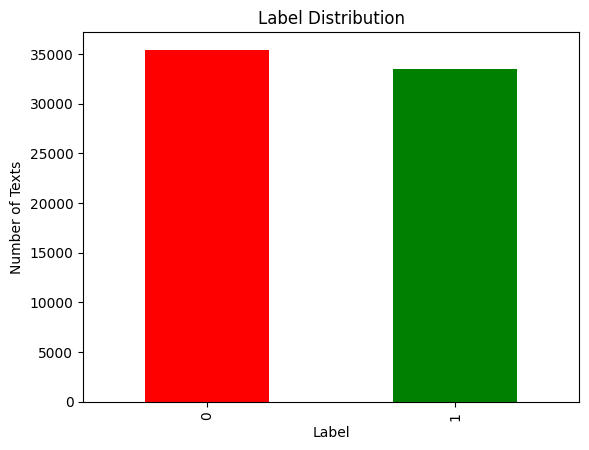

In [ ]:
# Group the data by label and count the number of occurrences
label_counts = datasetfinal.groupby('label').size()
ax = label_counts.plot(kind='bar')
# Set the color of the bar for label 0 to red
ax.patches[0].set_facecolor('red')
ax.patches[1].set_facecolor('green')
# Add labels to the plot
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Number of Texts')
# Show the plot
plt.show()

# **PREPROCESSING**

1.   lower case
2.   remove ponctuation
3.   remove stop words
4.   tokenization
5.   stemming et lemmatisation

In [ ]:
#lowercase
datasetfinal['text'] = datasetfinal['text'].apply(lambda x: x.lower())

In [ ]:
datasetfinal

,text,label
0,"haha, you see the goal of gomez a million times",1
1,i discovered that you watched football because...,1
2,the lot says italians describe each other\nand...,1
3,the artist pedro reyes is a biting social crit...,0
4,"once again shawky gharib, technical director o...",0
...,...,...
68942,donald j. trump addressed the massacre in orla...,0
68943,the arkansas parole board has recommended that...,0
68944,everyone catches up because there are no other...,1
68945,"city in the first minute of a goal, and the on...",1


In [ ]:
###################Remove_ponctuation#################################
def remove_punctuation(text):
  return ''.join(c for c in text if c not in string.punctuation)


In [ ]:
datasetfinal["text"] = datasetfinal["text"].apply(remove_punctuation)

In [ ]:
datasetfinal

,text,label
0,haha you see the goal of gomez a million times,1
1,i discovered that you watched football because...,1
2,the lot says italians describe each other\nand...,1
3,the artist pedro reyes is a biting social crit...,0
4,once again shawky gharib technical director of...,0
...,...,...
68942,donald j trump addressed the massacre in orlan...,0
68943,the arkansas parole board has recommended that...,0
68944,everyone catches up because there are no other...,1
68945,city in the first minute of a goal and the one...,1


In [ ]:
#####################STOP_WORDS######################
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)


In [ ]:
datasetfinal['text'] = datasetfinal['text'].apply(remove_stopwords)

In [ ]:
datasetfinal

,text,label
0,haha see goal gomez million times,1
1,discovered watched football players haha,1
2,lot says italians describe meetings league thr...,1
3,artist pedro reyes biting social critic whose ...,0
4,shawky gharib technical director olympic team,0
...,...,...
68942,donald j trump addressed massacre orlando fla ...,0
68943,arkansas parole board recommended one eight me...,0
68944,everyone catches companies orange right 4 year...,1
68945,city first minute goal one brought rahim alras...,1


In [ ]:
#########TOKENIZATION##################
def tokenize_text(col2):
    tokens = nltk.word_tokenize(col2)
    return tokens

In [ ]:
datasetfinal['text'] = datasetfinal['text'].apply(tokenize_text)

In [ ]:
datasetfinal

,text,label
0,"[haha, see, goal, gomez, million, times]",1
1,"[discovered, watched, football, players, haha]",1
2,"[lot, says, italians, describe, meetings, leag...",1
3,"[artist, pedro, reyes, biting, social, critic,...",0
4,"[shawky, gharib, technical, director, olympic,...",0
...,...,...
68942,"[donald, j, trump, addressed, massacre, orland...",0
68943,"[arkansas, parole, board, recommended, one, ei...",0
68944,"[everyone, catches, companies, orange, right, ...",1
68945,"[city, first, minute, goal, one, brought, rahi...",1


In [ ]:
##########################STEMMING##############################
porter_stemmer = PorterStemmer()
def stemming(text):
  stem_text = [porter_stemmer.stem(word) for word in text]
  return stem_text

In [ ]:
datasetfinal['text'] = datasetfinal['text'].apply(stemming)

In [ ]:
datasetfinal

,text,label
0,"[haha, see, goal, gomez, million, time]",1
1,"[discov, watch, footbal, player, haha]",1
2,"[lot, say, italian, describ, meet, leagu, thre...",1
3,"[artist, pedro, rey, bite, social, critic, who...",0
4,"[shawki, gharib, technic, director, olymp, team]",0
...,...,...
68942,"[donald, j, trump, address, massacr, orlando, ...",0
68943,"[arkansa, parol, board, recommend, one, eight,...",0
68944,"[everyon, catch, compani, orang, right, 4, yea...",1
68945,"[citi, first, minut, goal, one, brought, rahim...",1


In [ ]:
##########################LEMMATIZATION##############################
wordnet_lemmatizer=WordNetLemmatizer()
def lemmatizer(text):
  lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
  return lemm_text

In [ ]:
datasetfinal['text'] = datasetfinal['text'].apply(lemmatizer)

In [ ]:
datasetfinal

,text,label
0,"[haha, see, goal, gomez, million, time]",1
1,"[discov, watch, footbal, player, haha]",1
2,"[lot, say, italian, describ, meet, leagu, thre...",1
3,"[artist, pedro, rey, bite, social, critic, who...",0
4,"[shawki, gharib, technic, director, olymp, team]",0
...,...,...
68942,"[donald, j, trump, address, massacr, orlando, ...",0
68943,"[arkansa, parol, board, recommend, one, eight,...",0
68944,"[everyon, catch, compani, orang, right, 4, yea...",1
68945,"[citi, first, minut, goal, one, brought, rahim...",1


# **REPRESENTATION** 

1.   TfidfVectorizer



In [ ]:
vectorizer = TfidfVectorizer()

In [ ]:
# joins the elements of the list into a single string
datasetfinal.loc[:, 'text'] = datasetfinal['text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

**SPLITING DATA TO TEST AND TRAIN**

In [ ]:
X = datasetfinal['text']
y = datasetfinal['label']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train 

16372                    rule mean stop attack ahe alansar
67866                       offici karim fouad alahli club
42428    41 view novemb 02 2016 gold kwn king world new...
35311    say abdel hafeez director footbal alahli club ...
60584    alahli particip fifa world cup 2023 eighth tim...
                               ...                        
37194    john ibuka told u god simplifi long talk u con...
6265     excel semifin lose alhil excel leagu match los...
54886    origin publish jerusalem post one immort line ...
860      palo alto calif — donald j trump would silicon...
15795    wednesday joint press confer isra prime minist...
Name: text, Length: 48262, dtype: object

In [ ]:
X_train=vectorizer.fit_transform(X_train)

In [ ]:
X_train1=vectorizer.fit_transform(X_train1)

In [ ]:
X_test = vectorizer.transform(X_test)

In [ ]:
X_test1 = vectorizer.transform(X_test1)

**SAVE FIT X_TRAIN IN PKL FILE**

In [ ]:
#dump(X_train, open("/content/drive/MyDrive/fake_news_detection/tfidf.pkl", "wb"))

In [ ]:
with open('/content/drive/MyDrive/fake_news_detection/tfidf.pkl', 'rb') as f:
    pickle_model = pickle.load(f)

In [ ]:
print(type(pickle_model))

<class 'sklearn.feature_extraction.text.TfidfVectorizer'>


**DEFINE THE SVM MODEL**

In [ ]:
# Train an SVM model using the training set
svm_model = SVC(kernel='linear', C=1, gamma='auto', probability=True)

**SVM FITNESS**

In [ ]:
svm_model.fit(X_train, y_train)

SVC(C=1, gamma='auto', kernel='linear', probability=True)

**NAIVE BAYES MODEL**

In [ ]:
# Création d'un modèle Naive Bayes
clf = MultinomialNB()

**RANDOMFOREST FITNESS**

In [ ]:
# Entraînement du modèle sur les données d'entraînement
clf.fit(X_train1, y_train1)

MultinomialNB()

**SAVING THE MODEL IN JOBLIB FILE**

In [ ]:
# save the trained model to a file using joblib
dump(svm_model, '/content/drive/MyDrive/fake_news_detection/svm_model.joblib')

['/content/drive/MyDrive/fake_news_detection/svm_model.joblib']

**LOAD THE JOBLIB FILE THAT CONTIANS THE SVM TRAINED MODEL**

In [ ]:
loaded_model = load('/content/drive/MyDrive/fake_news_detection/svm_model.joblib')

In [ ]:
loaded_model

SVC(C=1, gamma='auto', kernel='linear', probability=True)

**SAVE NAIVE BAYES MODEL**

In [ ]:
# save the trained model to a file using joblib
dump(clf,'/content/drive/MyDrive/fake_news_detection/nb_model.joblib')

['/content/drive/MyDrive/fake_news_detection/nb_model.joblib']

**LOAD THE JOBLIB FILE THAT CONTIANS THE NAIVE BAYES TRAINED MODEL**

In [ ]:
naive_bayes_load = load('/content/drive/MyDrive/fake_news_detection/nb_model.joblib')

In [ ]:
naive_bayes_load

MultinomialNB()

**Y_pred with SVM fit model**

In [ ]:
y_pred = svm_model.predict(X_test)

In [ ]:
y_pred

array([0, 1, 0, ..., 1, 1, 0])

**Y_pred with SVM load file**

In [ ]:
y_pred1 = loaded_model.predict(X_test)

In [ ]:
y_pred1

array([0, 1, 0, ..., 1, 1, 0])

**Y_red with NAIVE BAYES MODEL**

In [ ]:
y_predN = clf.predict(X_test)

In [ ]:
y_predN

array([0, 1, 0, ..., 1, 1, 0])

**ACCURACY WITH NAIVE BAYES**

In [ ]:
accuracyN = accuracy_score(y_test1, y_predN)

In [ ]:
print("Accuracy:", accuracyN)

Accuracy: 0.904133430021755


**ACCURACY**

In [ ]:
accuracy = accuracy_score(y_test, y_pred1)

In [ ]:
print("Accuracy:", accuracy)

Accuracy: 0.9405366207396664


**PLOT ACCURACY FOR EACH MODEL _DIFFERECE BETWEE MODELS**

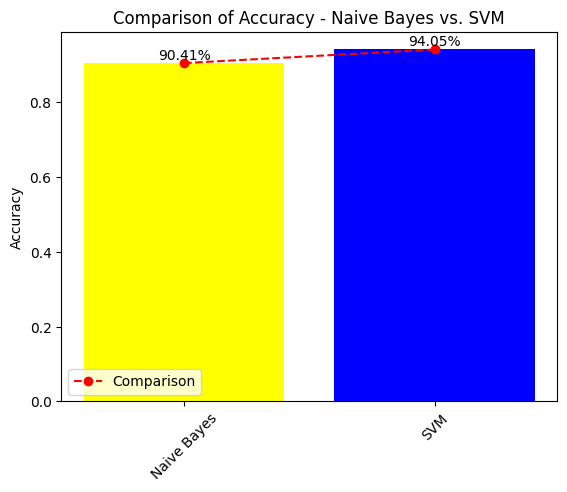

In [ ]:
# Compute the difference in accuracy
accuracy_diff = accuracy- accuracyN

# Convert accuracies to percentages
accuracy_naive_bayes_percent = accuracyN * 100
accuracy_svm_percent = accuracy * 100
accuracy_diff_percent = accuracy_diff * 100

# Create a bar plot
models = ['Naive Bayes', 'SVM']
accuracies = [accuracyN, accuracy]

fig, ax = plt.subplots()

# Plot the accuracies as bars with percentage labels
bar_colors = ['yellow', 'blue']
for i in range(len(models)):
    ax.bar(models[i], accuracies[i], color=bar_colors[i])
    ax.text(i, accuracies[i] + 0.01, f'{accuracies[i]*100:.2f}%', ha='center')

# Plot the comparison as a continuous dashed line with markers
ax.plot(models, accuracies, 'r--o')

# Add labels and title to the plot
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Accuracy - Naive Bayes vs. SVM')
ax.legend(['Comparison'])
plt.xticks(rotation=45)

plt.show()


**TEST HAKIMI'S NEWS**

In [ ]:
with open('/content/drive/MyDrive/fake_news_detection/achraf_hakimi_fake_news.txt', 'r') as f:
    new_article = f.read()

In [ ]:
#nkhdmo b probabilite 
X_new = vectorizer.transform([new_article])
probabilities = svm_model.predict_proba(X_new)[0]

In [ ]:
#loaded_model
X_new = vectorizer.transform([new_article])
probabilities = loaded_model.predict_proba(X_new)[0]

In [ ]:
print('Probabilities:', probabilities)

Probabilities: [0.02590447 0.97409553]


In [ ]:
print('Real probability:', probabilities[0])
print('Fake probability:', probabilities[1])

Real probability: 0.0533356312032867
Fake probability: 0.9466643687967133


**test mn dataset, ce text label with 0**

In [ ]:
with open('/content/drive/MyDrive/fake_news_detection/temoi_dataset.txt', 'r') as f:
    temoine = f.read()

In [ ]:
X_new0 = vectorizer.transform([temoine])
probabilities0 = loaded_model.predict_proba(X_new0)[0]

In [ ]:
print('Real probability:', probabilities0[0])
print('Fake probability:', probabilities0[1])

Real probability: 0.6103140770240093
Fake probability: 0.3896859229759908


**REAL MADRIR'S MATCH CONTRE GIRONA 25/04/2023**

In [ ]:
with open('/content/drive/MyDrive/fake_news_detection/real_madrid_match_contre_girona.txt', 'r') as f:
    real_madrid = f.read()

In [ ]:
X_new1 = vectorizer.transform([real_madrid])
probabilities1 = loaded_model.predict_proba(X_new1)[0]

In [ ]:
print('Real probability:', probabilities1[0])
print('Fake probability:', probabilities1[1])

Real probability: 0.9291047745345105
Fake probability: 0.07089522546548958


**ZIDAN FAKE NEWS**

In [ ]:
with open('/content/drive/MyDrive/fake_news_detection/zidan_fake_news.txt', 'r') as f:
    zidan_fake_news = f.read()

In [ ]:
X_new2 = vectorizer.transform([zidan_fake_news])
probabilities2 = loaded_model.predict_proba(X_new2)[0]

In [ ]:
print('Real probability:', probabilities2[0])
print('Fake probability:', probabilities2[1])

Real probability: 0.2165900061574624
Fake probability: 0.7834099938425375


**RONALDO FAKE NEWS**

In [ ]:
with open('/content/drive/MyDrive/fake_news_detection/ronaldo_fake_news.txt', 'r') as f:
    ronaldo_fake_news = f.read()

In [ ]:
X_new3 = vectorizer.transform([ronaldo_fake_news])
probabilities3 = loaded_model.predict_proba(X_new3)[0]

In [ ]:
print('Real probability:', probabilities3[0])
print('Fake probability:', probabilities3[1])

Real probability: 0.38993928714930587
Fake probability: 0.6100607128506942


**CLASSIFICATION REPORT**

In [ ]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94     10724
           1       0.93      0.95      0.94      9961

    accuracy                           0.94     20685
   macro avg       0.94      0.94      0.94     20685
weighted avg       0.94      0.94      0.94     20685



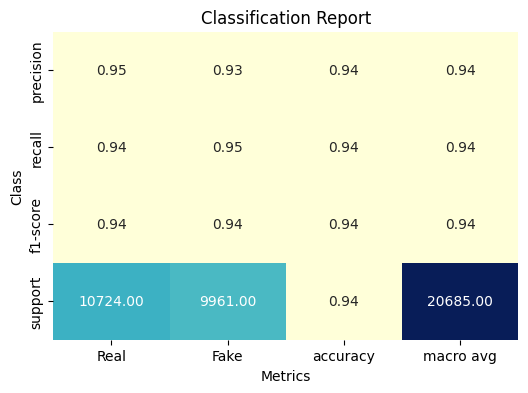

In [ ]:
# Generate the classification report
report = classification_report(y_test, y_pred1, target_names=['Real', 'Fake'], output_dict=True)
# Convert the report dictionary to a DataFrame
report_df = pd.DataFrame(report).transpose()
# Plot the classification report
plt.figure(figsize=(6, 4))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='YlGnBu', fmt=".2f", cbar=False)
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.title('Classification Report')
plt.show()

In [ ]:
class_names = ['0', '1']

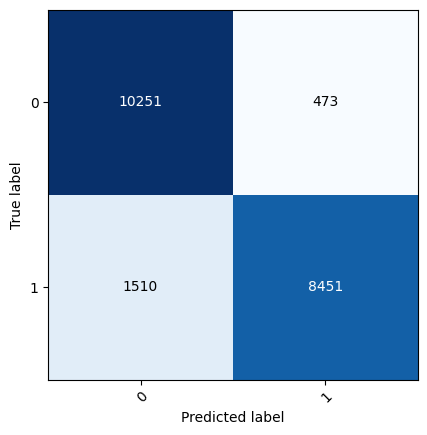

In [ ]:
# calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# set up the plot
fig, ax = plt.subplots()
# plot the confusion matrix as an image with a blue color map
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
# set the labels for the x-axis and y-axis
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       ylabel='True label',
       xlabel='Predicted label')
# rotate the x-axis labels if needed
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
# loop over the data to add the values to the plot
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > cm.max() / 2. else "black")
# show the plot
plt.show()